<a href="https://colab.research.google.com/github/reidnclark/MFDPRepo/blob/main/MFDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Multipurpose Financial Data Processor**
### Updated June 2, 2025
### Author: Reid Clark
---
## *Capabilities:*
- 1) Monte Carlo Risk Simulation (Statistical Uncertainty Tool)
- 2) Individual Stock Financial / Fundamental Analysis (Manual, Direct from Balance Sheet)
- 3) Option Price Simulator (Beta)
---

## 1) *Portfolio Risk in Efficient Frontier Monte Carlo Simulation*


---


## **Add Tickers for Portfolio Risk Assessment Here:**


In [ ]:
ticks = ["ADBE","EQNR","RYCEY","ISRG","HTHIF","NVO","PFE","LIN","VFV.TO"]

## After running above, run code here:
---

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


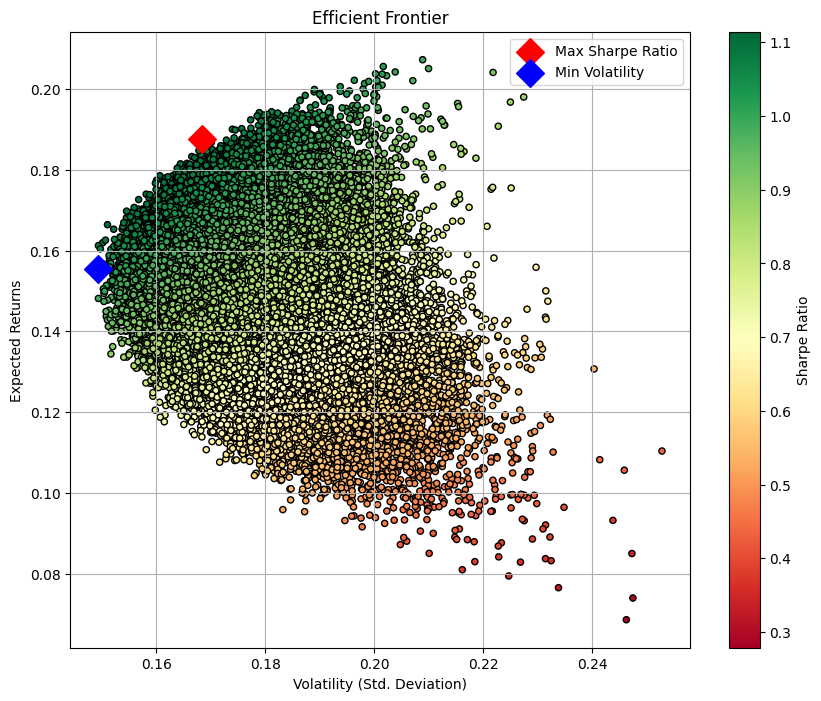

╒═════════════╤════════════════╤════════════════════╕
│ Statistic   │   Sharpe Ratio │   Portfolio Return │
╞═════════════╪════════════════╪════════════════════╡
│ t-statistic │        2025.69 │            2531.26 │
├─────────────┼────────────────┼────────────────────┤
│ p-value     │           0    │               0    │
╘═════════════╧════════════════╧════════════════════╛

Portfolio Allocations:
ADBE: 25.84%
EQNR: 0.75%
RYCEY: 0.80%
ISRG: 0.95%
HTHIF: 11.78%
NVO: 21.37%
PFE: 8.71%
LIN: 1.87%
VFV.TO: 27.93%


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from tabulate import tabulate

def get_historical_data(tickers):
    data = pd.DataFrame()
    for i in tickers:
        ticker_data = yf.download(i, start="2010-10-11", end="2023-11-19")["Adj Close"]
        data = pd.concat([data, ticker_data], axis=1)
    data.columns = tickers
    return data

d = get_historical_data(ticks)
dT = d.iloc[d.shape[0] - 252:]
d = d.iloc[:d.shape[0] - 252]

expected_returns_a = d.pct_change()
expected_returns_a.columns = ticks
expected_returns_aA = pd.DataFrame(expected_returns_a.mean() * 250).T

dar = d.pct_change().iloc[1:, :] + 1
gar = pd.DataFrame(np.prod(dar) ** (1 / float(6)) - 1)

full_return_annual = pd.concat([expected_returns_aA.T, gar], axis=1)
full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"]

portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []
stock_weights = []

num_assets = len(ticks)
num_portfolios = 75000

daily_returns = d.pct_change()
annual_returns = (daily_returns.mean() * 250) + 1
cov_daily = daily_returns.cov()
cov_annual = cov_daily * 250

np.random.seed(3)

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, annual_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = (returns - 1) / volatility
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns - 1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter, symbol in enumerate(ticks):
    portfolio[symbol + ' Weight'] = [Weight[counter] for Weight in stock_weights]

df = pd.DataFrame(portfolio)

df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200, label='Max Sharpe Ratio')
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200, label='Min Volatility')
plt.legend()

plt.show()

sharpe_values = np.array(sharpe_ratio)
sharpe_null_mean = 0  # Null hypothesis: Sharpe ratio is zero
sharpe_t_statistic, sharpe_p_value = stats.ttest_1samp(sharpe_values, sharpe_null_mean)

portfolio_null_mean = 0  # Null hypothesis: Portfolio return is zero
portfolio_t_statistic, portfolio_p_value = stats.ttest_1samp(portfolio_returns, portfolio_null_mean)

results_table = [
    ["Statistic", "Sharpe Ratio", "Portfolio Return"],
    ["t-statistic", sharpe_t_statistic, portfolio_t_statistic],
    ["p-value", sharpe_p_value, portfolio_p_value]
]

print(tabulate(results_table, headers="firstrow", tablefmt="fancy_grid"))

# Print portfolio allocations
print("\nPortfolio Allocations:")
for symbol in ticks:
    print(f"{symbol}: {sharpe_portfolio[symbol + ' Weight'].values[0] * 100:.2f}%")



---
## 2) *Individual Stock Analysis*


---


## **Enter Ticker and Date Range for Volatility Analysis Here:**

In [ ]:
actualstock = "AMZN"
period_ = '6mo'

## After running above, run code here:
---

----------------
----------------


----------------
----------------
----------------


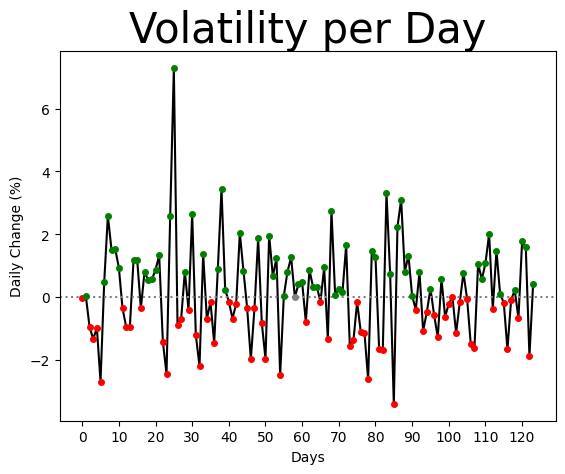

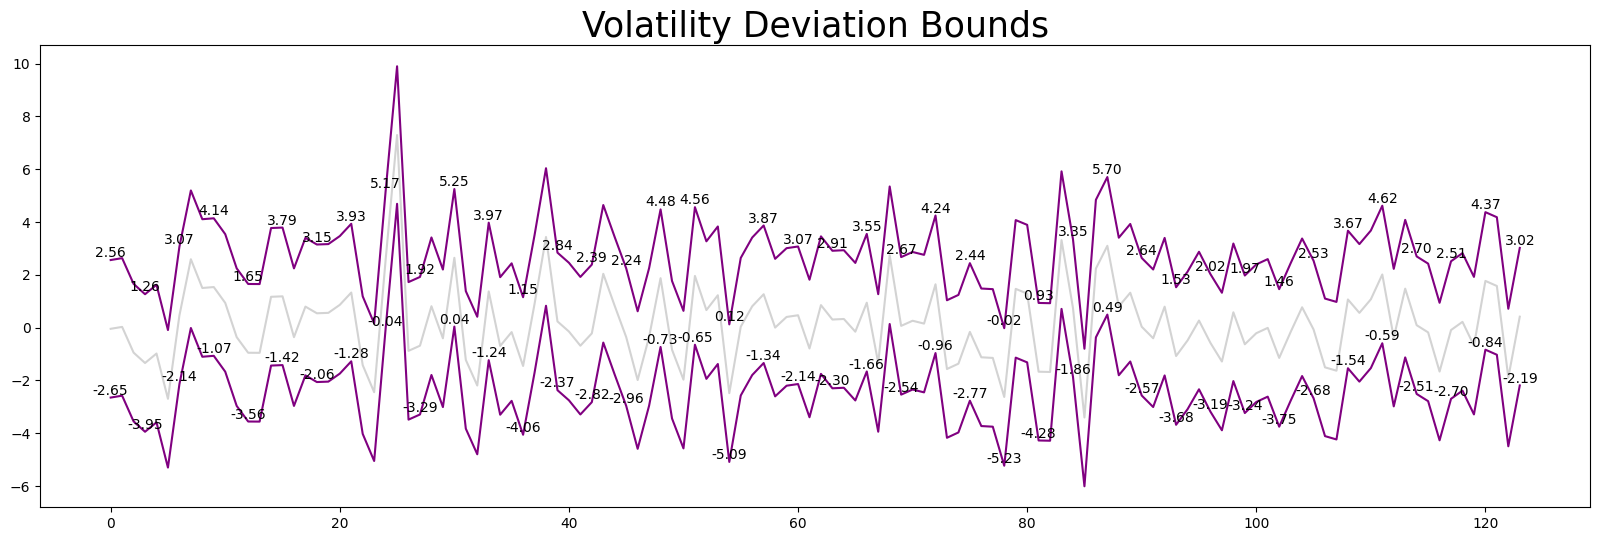

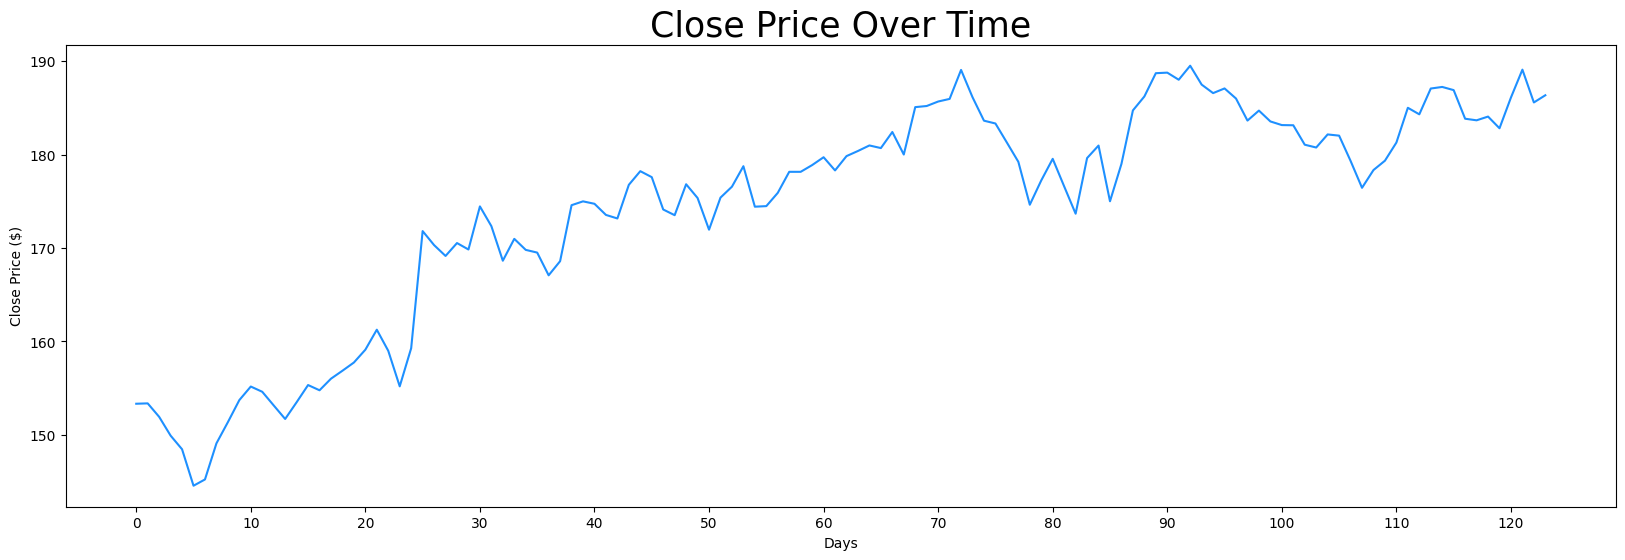

----------------
----------------
----------------
----------------
----------------
----------------
----------------
Executed in 2.011 seconds.
----------------
Ticker Name: AMZN
Date of Most Recent Info: 2023-12-31
Diluted EPS: 2.9
Weighted Average Cost of Capital (WACC): 14.95%
Industry Returns for Period 6mo: 4.51%
Enterprise Value: $2,001,389,746,261.09
Estimated Intrinsic Value: $1,876,941,746,261.09
Current Price: $186.34
Implied Share Price: $180.77
Acceptable Buy Price Given Margin of Safety (0.30 or 30%): $162.69
Sell


In [ ]:
import yfinance as yf
import time
import datetime
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
from datetime import datetime as seconddatetime
start_time = time.time()
from IPython.display import display, HTML
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def format_text_html_3d(text):
    return f'<div style="font-size:24px;color:white;font-family:Arial;text-shadow: 2px 2px 4px #000000;">{text}</div>'

start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
period_specified_ = ''

#ticker = yf.Ticker("BTCC-B.TO")
ticker = yf.Ticker(actualstock)
market_index_input = '^GSPC'
#ticker = yf.Ticker("TECK-A.TO")
ticker_balsheet = pd.DataFrame(ticker.balance_sheet)
balsheet_categories = ticker_balsheet.index
ticker_histdata = ticker.history(period=period_)
histdata_categories = ticker_histdata.index
close_vals = ticker_histdata['Close']
np_close_vals = np.array(close_vals)

def closevals_change_calculator(array):
    index = 0
    change_closevals = []
    while index < (len(array)-1):
        change_at_interval = round(((1 - (array[index] / array[index+1]))*100),3)
        change_closevals.append(change_at_interval)
        index +=1
    #print(change_closevals)
    print('----------------')

    x_axis = range(len(array)-1)

    plt.plot(x_axis, change_closevals, color='black')
    plt.xlabel('Days')
    plt.ylabel('Daily Change (%)')
    plt.title('Volatility per Day',fontsize=30)
    plt.xticks(np.arange(0, len(array)-1, step=10))
    plt.axhline(y=0, color='grey', linestyle=':')
    for i in range(len(change_closevals)):
        if change_closevals[i] > 0:
            plt.plot(i, change_closevals[i], marker='o', markersize=4, color='green')
        elif change_closevals[i] < 0:
            plt.plot(i, change_closevals[i], marker='o', markersize=4, color='red')
        else:
            plt.plot(i, change_closevals[i], marker='o', markersize=4, color='grey')

    print('----------------')

    sum_change_closevals = sum(abs(val) for val in change_closevals)
    avg_velocity_perday = sum_change_closevals / len(change_closevals)
    std_closevals = np.std(change_closevals)
    ticker_name = ticker.info['longName']




    formatted_name = (f'{ticker_name}')
    display(HTML(format_text_html_3d(formatted_name)))

    apdv = (f'Average per Day Volatility: {round(avg_velocity_perday,3)} % per day')
    display(HTML(format_text_html_3d(apdv)))

    ods = (f'Overall Deviation of Series: {(round((std_closevals),3))} % bounds')
    display(HTML(format_text_html_3d(ods)))




    current_price = ticker.history(period='1d')['Close'].iloc[-1]
    formatted_current_price = (f'Current Price:${current_price}')
    display(HTML(format_text_html_3d(formatted_current_price)))

    #display(HTML('<textarea rows="10" cols="80">{}</textarea>'.format(text)))

    baseline = 0
    upper_bound = baseline + avg_velocity_perday + std_closevals
    lower_bound = baseline - avg_velocity_perday - std_closevals

    def boundgrapher(array):
        index = 0
        upper_bounds_chain = []
        lower_bounds_chain = []

        while index < len(array):
            upper_bounds_chain.append(change_closevals[index] + upper_bound)
            lower_bounds_chain.append(change_closevals[index] + lower_bound)
            index += 1

        x_axis_forbounds = len(change_closevals)

        fig, ax = plt.subplots(figsize=(20, 6))
        ax.plot(range(0, x_axis_forbounds), change_closevals, color='lightgrey')
        ax.plot(range(0, x_axis_forbounds), upper_bounds_chain, color='purple')
        ax.plot(range(0, x_axis_forbounds), lower_bounds_chain, color='purple')

        print('----------------')
        print('----------------')
        print('----------------')

        # Adding labels above the lines for every 3 points
        for i in range(0, len(change_closevals), 3):
            ax.text(i, upper_bounds_chain[i], f'{upper_bounds_chain[i]:.2f}', ha='center', va='bottom')
            ax.text(i, lower_bounds_chain[i], f'{lower_bounds_chain[i]:.2f}', ha='center', va='bottom')

        ax.set_title('Volatility Deviation Bounds',fontsize=25)

        plt.show()

    boundgrapher(change_closevals)

    # Plotting close prices
    plt.figure(figsize=(20, 6))
    plt.plot(array[1:], color='dodgerblue')
    plt.xlabel('Days')
    plt.xticks(np.arange(0, len(array)-1, step=10))
    plt.ylabel('Close Price ($)')
    plt.title('Close Price Over Time',fontsize=25)
    plt.show()

    print('----------------')
    print('----------------')
    print('----------------')
    print('----------------')

    print('----------------')
    print('----------------')
    print('----------------')

closevals_change_calculator(np_close_vals)

end_time = time.time()
execution_time = end_time - start_time
print(f'Executed in {round((execution_time),3)} seconds.')
print('----------------')


def start_function():

    def currency_formatter(value):
        return locale.currency(value, grouping=True)

    def main():
        def all():
            stock1 = yf.Ticker(actualstock)
            print(f'Ticker Name: {actualstock}')

            market_index = yf.Ticker(market_index_input)

            def main_body():
                def wacc_and_related():
                    def dcf_model():
                        def enterprise_valuator():

                            ent_val = mkt_cap + total_debt - cash_and_ce

                            equity_val = mkt_cap + cash_and_ce - total_debt

                            implied_share_price = equity_val / no_of_shares

                            print(f'Enterprise Value: {currency_formatter(ent_val)}')
                            print(f'Estimated Intrinsic Value: {currency_formatter(equity_val)}')
                            print(f'Current Price: {currency_formatter(current_price)}')
                            print(f'Implied Share Price: {currency_formatter(implied_share_price)}')

                            dif = (current_price/implied_share_price)

                            mrg_of_sfty = 0.1

                            acceptable_buy_price = (1 - mrg_of_sfty)*implied_share_price
                            print(f'Acceptable Buy Price Given Margin of Safety (0.30 or 30%): {currency_formatter(acceptable_buy_price)}')

                            if current_price > acceptable_buy_price:
                                print('Sell')
                            elif current_price == acceptable_buy_price:
                                print('Hold')
                            else:
                                print('Buy')

                        fcf = cashflow_st['Free Cash Flow']

                        annual_g = (market_returns.iloc[-1] - market_returns.iloc[0])*2

                        perp_growth_terminal_val = (fcf * (1 + annual_g)) / (wCoC - annual_g)

                        enterprise_valuator()

                    wCoC = ((erp * beta) + rf) + cost_of_debt
                    final_wacc = wCoC*100
                    print(f'Weighted Average Cost of Capital (WACC): {round((final_wacc),2)}%')

                    print(f'Industry Returns for Period {period_}: {round((variance_of_market*100000),2)}%')

                    dcf_model()

                scraped_dates = (stock1.balance_sheet.iloc[0]).index
                bal_sheet_date = (str(scraped_dates[0]))[:10]
                print(f'Date of Most Recent Info: {bal_sheet_date}')
                bal_sheet = stock1.balance_sheet[bal_sheet_date]
                inc_st = stock1.income_stmt[bal_sheet_date]
                cashflow_st = stock1.cashflow[bal_sheet_date]
                df_cashflow_st = pd.DataFrame(cashflow_st)

                eps = inc_st["Diluted EPS"]
                print(f'Diluted EPS: {eps}')

                mkt_cap = stock1.basic_info['marketCap']
                no_of_shares = bal_sheet['Ordinary Shares Number']

                stock1_info = stock1.history
                df_stock1_info = pd.DataFrame(stock1_info(period=(period_)))
                stock1_cvals = df_stock1_info['Close']

                current_price = stock1_cvals.iloc[-1]

                pe_ratio = current_price / eps

                market_data = market_index.history(period=(period_))
                df_market_data = pd.DataFrame(market_data)

                stock1_returns = (stock1_cvals.pct_change().dropna())
                market_returns = df_market_data['Close'].pct_change().dropna()

                difference = int(len(stock1_returns) - len(market_returns))
                stock1_returns_equalized = []
                market_returns_equalized = []

                if difference > 0:
                    stock1_returns_equalized = stock1_returns.iloc[:-difference]
                    market_returns_equalized = market_returns
                elif difference < 0:
                    stock1_returns_equalized = stock1_returns
                    market_returns_equalized = market_returns.iloc[-difference:]
                else:
                    stock1_returns_equalized = stock1_returns
                    market_returns_equalized = market_returns

                covariance = np.cov(stock1_returns_equalized, market_returns_equalized)[0,1]
                variance_of_market = np.var(market_returns_equalized)

                beta = covariance / variance_of_market

                erp = 0.046
                rf = 0.0422
                rm = 0.08

                cost_of_equity = rf + beta * (rm - rf)

                total_assets = bal_sheet['Total Assets']
                total_debt = bal_sheet['Total Debt']
                total_liabilities = bal_sheet['Total Liabilities Net Minority Interest']
                future_debt = (bal_sheet['Total Non Current Liabilities Net Minority Interest']) \
                                + (bal_sheet['Other Non Current Liabilities'])

                cmn_stock = bal_sheet['Common Stock']
                cmn_stock_equity = bal_sheet['Common Stock Equity']
                treasury_stock = cmn_stock - cmn_stock_equity
                apic = bal_sheet['Capital Stock']
                retained_earnings = bal_sheet['Retained Earnings']
                total_equity = cmn_stock + (apic*0) + retained_earnings + treasury_stock #+ oci

                mkt_val_ofdebt = future_debt / (1+rf)**5
                ann_int_pmt = total_debt * rf
                cost_of_debt = ann_int_pmt / mkt_val_ofdebt

                equity_weightage = (total_equity / mkt_cap) * 100
                debt_weightage = (total_debt / mkt_cap) * 100

                cash_and_ce = bal_sheet['Cash And Cash Equivalents']
                debt_ratio = total_debt / total_assets

                wacc_and_related()

            main_body()

        all()
    main()

start_function()

---
## 3) *Options Price Simulator (Beta)*


---


## **Enter Forecasted Price Target Here:**

In [ ]:
forecasted_pricetarget = 205

## After running above, run code here:
---

In [ ]:
options_data = ticker.option_chain()
options_index_data = list(options_data[2].items())


print('--------')
for i in options_index_data:
    if 'trailingPE' in i:
        print(i)


call_option_data = options_data[0]
put_option_data = options_data[1]
#print(call_option_data)


print('--------')
current_price = ticker.history(period='1d')['Close'].iloc[-1]
formatted_current_price = (f'Current Price: ${round((current_price),2)}')
print(formatted_current_price)
print('--------')

call_strike_list = call_option_data['strike']
put_strike_list = put_option_data['strike']
call_lastprice_data = call_option_data['lastPrice']
put_lastprice_data = put_option_data['lastPrice']
#print(strike_list)



integer_ct = 0
liszt = []
for i in call_strike_list:
    if i > current_price:
        muadib = i
        print(f'Closest Call to Current Price: ${i}')
        break  # Exit the loop when the condition is met
    integer_ct+=1

print(f'Last Price at Closest Call Strike: ${call_lastprice_data[integer_ct]}')
minbuy = 100 # units
print(f'Minimum Buy: x{minbuy}')

call_total_min_incurred = (call_lastprice_data[integer_ct])
print(f'Minimum Incurred Cost: ${call_total_min_incurred*minbuy}')
print(f'Expiry: ')
print('--------')

put_integer_ct = 0
put_liszt = []
for i in put_strike_list:
    if i > current_price:
        put_liszt.append(put_strike_list[put_integer_ct-1])
        break  # Exit the loop when the condition is met
    put_integer_ct+=1

print(f'Closest Put to Current Price: ${(put_liszt[0])}')
print(f'Last Price at Closest Call Strike: ${put_lastprice_data[put_integer_ct-1]}')
print(f'Minimum Buy: x{minbuy}')

put_total_min_incurred = (put_lastprice_data[put_integer_ct-1])
print(f'Minimum Incurred Cost: ${put_total_min_incurred*minbuy}')
print(f'Expiry: ')
print('--------')

print('Simulated call results')
print('--------')

print(f'Forecast Price Target: ${forecasted_pricetarget}')
print(f'Purchased Call Price: ${muadib}')

call_profit = forecasted_pricetarget - muadib
total_call_profit = call_profit * minbuy
total_call_contractfees = call_total_min_incurred*minbuy

put_profit = forecasted_pricetarget - put_liszt[0]

print(f'Profit per Share: ${call_profit}')
print(f'Total Profit: ${total_call_profit}')
print(f'Net Contract Fees: ${total_call_contractfees}')
print('--------')
print('Excercised: Yes')
print(f'Net Differential: +${total_call_profit-total_call_contractfees}')
print('--------')

print('Simulated put results')
print('--------')
print(f'Forecast Price Target: ${forecasted_pricetarget}')
print(f'Purchased Put Price: ${(put_liszt[0])}')
print(f'Loss per Share: ${put_profit}')
print(f'Total Loss: -${put_profit*minbuy}')
print('--------')
print('Excercised: No')
print(f'Net Differential: -${put_total_min_incurred*minbuy}')


print('--------')
print('Simulated straddle')
print('--------')

print(f'Straddle Differential: +${(total_call_profit-total_call_contractfees)-(put_total_min_incurred*minbuy)}')
print('--------')

implied_volatility = 1 - (put_liszt[0] / forecasted_pricetarget)
print(f'Implied Volatility: {round((implied_volatility*100),2)}%')
print('--------')
print('----------------')

--------
('trailingPE', 52.342697)
--------
Current Price: $186.34
--------
Closest Call to Current Price: $187.5
Last Price at Closest Call Strike: $1.43
Minimum Buy: x100
Minimum Incurred Cost: $143.0
Expiry: 
--------
Closest Put to Current Price: $185.0
Last Price at Closest Call Strike: $1.18
Minimum Buy: x100
Minimum Incurred Cost: $118.0
Expiry: 
--------
Simulated call results
--------
Forecast Price Target: $205
Purchased Call Price: $187.5
Profit per Share: $17.5
Total Profit: $1750.0
Net Contract Fees: $143.0
--------
Excercised: Yes
Net Differential: +$1607.0
--------
Simulated put results
--------
Forecast Price Target: $205
Purchased Put Price: $185.0
Loss per Share: $20.0
Total Loss: -$2000.0
--------
Excercised: No
Net Differential: -$118.0
--------
Simulated straddle
--------
Straddle Differential: +$1489.0
--------
Implied Volatility: 9.76%
--------
----------------
